# Credit Card Fraud Detection

In [1]:
#pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('creditcard.csv')

## Pre-Processing and Cleaning

In [4]:
df.shape

(284807, 31)

Removing duplicate rows in the dataset

In [5]:
df= df.drop_duplicates()
df.shape

(283726, 31)

Check if there are any missing values in the dataset

In [6]:
df.isnull().values.sum()

0

Inspect the variables, their data types and their disctribution

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#print(df.dtypes)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


The dataset variables V1 to V28 are already converted to principle components via PCA process to reduce dataset dimensionality. The Mean values of the data varialbes V1 to V28 is close to 0 and that shows they are already normalized. Applying scaler function to normalize the Amount varible. 

In [10]:
from sklearn.preprocessing import StandardScaler
df['Amount_Norm'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

Drop Amount varialbe as we are going to use the calculated normalized amount.<BR>
Drop Time variables as that is not going to be used for modelling purposes

In [11]:
df = df.drop(['Amount'],axis=1)
df = df.drop(['Time'],axis=1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


## Exploratory Data Analysis

Check the distribution of the predictor variable ( Class variable) to determine if the dataset is balanced or imbalanced. 

0    283253
1       473
Name: Class, dtype: int64

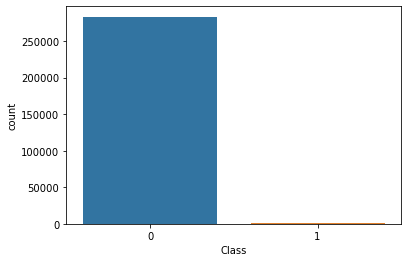

In [13]:
import seaborn as sns
sns.countplot(x="Class", data=df)
df.Class.value_counts()

As we can see the Class variable is highly imbalanced therefore we will try to balance the dataset using undersamplting ( Random Under Sampling) and oversampling techiniques ( SMOTE) and record out observation if the the performace of the model is affected by the treatment.

Check correlations among the varialbes to identify if there are correlated variables in the dataset. We wil plot a correlation heatmap for visulization. 

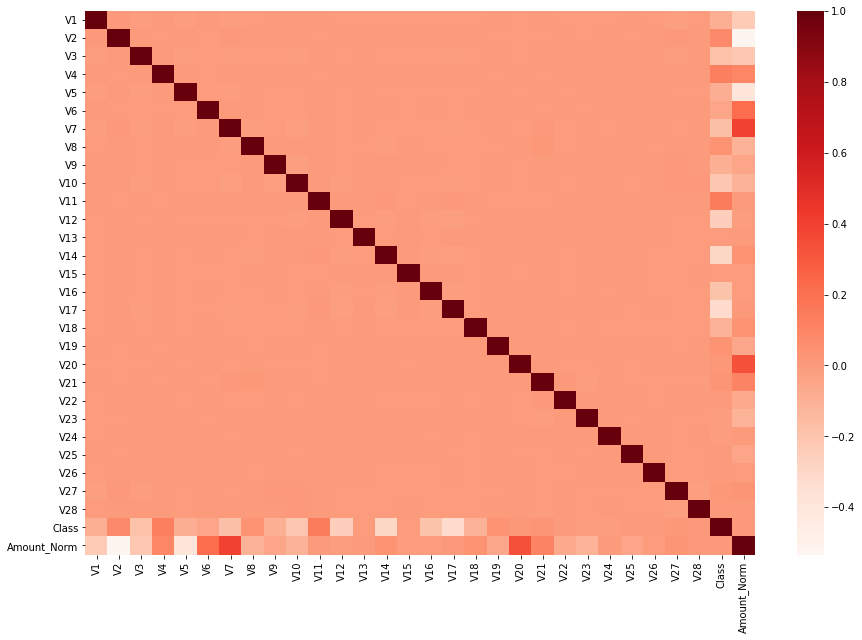

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap='Reds')

We notice that Class variable shows high negative correlation with with a few variables. To get a better understanding of the variables that are important for our data model we will use another Feature Selection method.
Applying Random Forest Feature selection. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
#from matplotlib import pyplot as plt

In [16]:
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (198608, 29)
y_train:  (198608, 1)
X_test:  (85118, 29)
y_test:  (85118, 1)


In [17]:
rf= RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [18]:
feature_names = list(X.columns.values.tolist())
print(feature_names)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Norm']


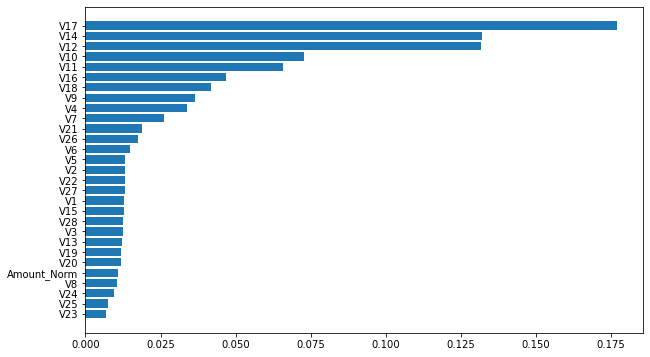

In [19]:
fi = list(zip(feature_names,rf.feature_importances_))
fi.sort(key = lambda x : x[1])
plt.figure(figsize=[10,6])
plt.barh([x[0] for x in fi],[x[1] for x in fi])
plt.show()

In [20]:
#Create an object to store the variables that are above the threshhold. Threshhold = 0.24
sfm = SelectFromModel(rf, threshold=0.024)


In [21]:
# Train the selector
sfm.fit(X_train,y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold=0.024)

In [22]:
feature_index = sfm.get_support(indices=True)

In [23]:
print(feature_index)

[ 3  6  8  9 10 11 13 15 16 17]


In [24]:
#Create a new training and test sets with only the most important features.
X_train_imp = X_train.iloc[:,feature_index]
X_test_imp = X_test.iloc[:,feature_index]
imp_feature_names = list(X_train_imp.columns.values.tolist())
print ('Most Important Features list :' , imp_feature_names)

Most Important Features list : ['V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']


In [25]:
# Check the new training and test sets.
X_train_imp.head()

,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
157273,-0.730378,-0.985979,1.064679,0.450358,1.582596,-2.119765,1.092838,1.553938,0.411284,-0.627195
85720,0.350082,-0.921091,0.564473,-0.096028,-0.482697,0.166327,-0.084534,0.631687,-0.916422,0.679195
197131,1.379143,0.488495,0.024250,-0.158313,1.004735,0.148661,-0.586419,0.006550,0.826246,0.644805
58983,-0.285321,-0.715670,0.496412,-0.151072,-0.571469,0.260292,-0.035803,-0.036153,-0.405840,-0.110100
191505,1.200438,-0.330835,0.842726,0.158703,-1.331880,0.227492,0.012994,0.643311,-0.960520,0.078563


In [26]:
#Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=0)

In [27]:
# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_train_imp,y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [28]:
# Calculating accurary score with all features(29 featuers)
y_pred = rf.predict(X_test)
print('All features accuracy score: ' , accuracy_score(y_test, y_pred))

# Calculating accurary score with important features only ( 10 features)
y_pred_imp = rf_important.predict(X_test_imp)
print ('Important features only accuracy score: ' , accuracy_score(y_test, y_pred_imp))

All features accuracy score:  0.9995888061279635
Important features only accuracy score:  0.9995535609389319


With this approach we will be able to reduce the number of features and the inturn reduce the run complexity of the model, without compromising on the accuracy. 

In [29]:
# Selecting only featured columns from the orginal dataframe
df = df.iloc[:,feature_index]

In [30]:
df.head()

,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


Draw a histogram for the available variables to observer the distribution. 

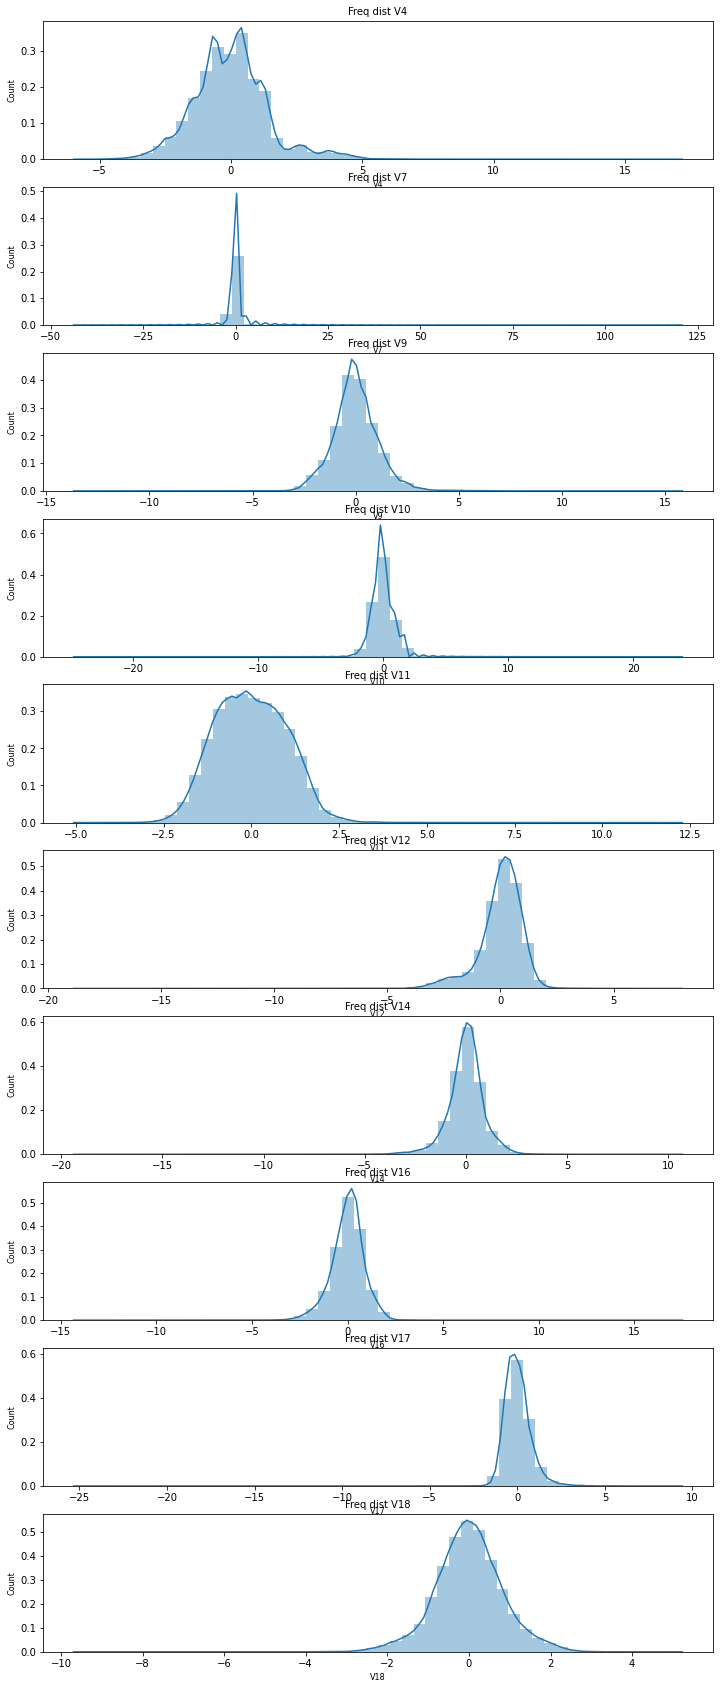

In [31]:
fig, ax = plt.subplots(len(imp_feature_names), figsize=(12,30))
for i, col_val in enumerate(imp_feature_names):
    sns.distplot(df[col_val], ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Split original dataset into training and test sets using Sklearn

In [32]:
#from sklearn.model_selection import train_test_split
#X = df.iloc[:, df.columns != 'Class']
#y = df.iloc[:, df.columns == 'Class']
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [33]:
#Renaming the test-train split with imporant features as mainstream test-train dataset. Test train split is 30-70. 
X_train = X_train_imp 
X_test = X_test_imp
y_pred = y_pred_imp

In [34]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (198608, 10)
y_train:  (198608, 1)
X_test:  (85118, 10)
y_test:  (85118, 1)


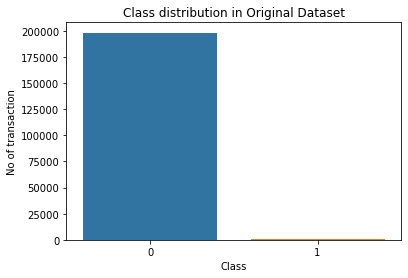

In [35]:
# Plotting class balance
sns.countplot(x="Class", data=y_train)
plt.title("Class distribution in Original Dataset")
plt.ylabel("No of transaction")
plt.show()

Preparing data with Undersampling ( Using random Undersampling)

In [36]:
#pip install imbalanced-learn

In [37]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train_under:  (688, 10)
y_train_under:  (688, 1)
X_test_under:  (85118, 10)
y_test_under:  (85118, 1)


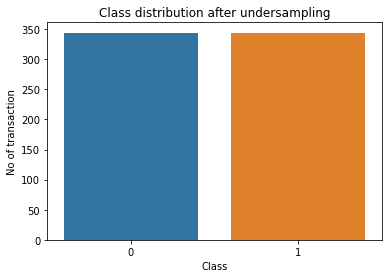

In [38]:
# Plotting class balance for undersampled dataset
sns.countplot(x="Class", data=y_train_under)
plt.title("Class distribution after undersampling")
plt.ylabel("No of transaction")
plt.show()

In [39]:
X_train_under.head()

,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-0.533875,0.447445,0.293203,0.389481,0.475605,-0.475354,-0.200108,0.156919,-0.665012,0.539384
1,-0.239615,0.926428,0.138146,-1.437843,-0.114610,0.285760,-1.016613,0.420602,0.787645,1.217430
2,-0.652656,0.968999,-0.023912,-0.718260,1.703556,0.661141,-2.997826,0.820214,1.258986,1.737994
3,1.390645,0.554956,0.271918,-0.345601,-1.272765,0.853019,-0.219021,-0.131550,-0.400095,-0.336061
4,-0.937520,0.229828,1.526454,-1.430498,1.698959,-1.908167,1.695797,0.496595,-0.326808,0.826757


Preparing data with Oversampling ( Using SMOTE)

In [40]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE(sampling_strategy='minority')
X_train_over,y_train_over=oversample.fit_resample(X_train, y_train)
X_test_over, y_test_over = X_test, y_test

print("X_train_over: ",X_train_over.shape)
print("y_train_over: ",y_train_over.shape)
print("X_test_over: ",X_test_over.shape)
print("y_test_over: ",y_test_over.shape)

X_train_over:  (396528, 10)
y_train_over:  (396528, 1)
X_test_over:  (85118, 10)
y_test_over:  (85118, 1)


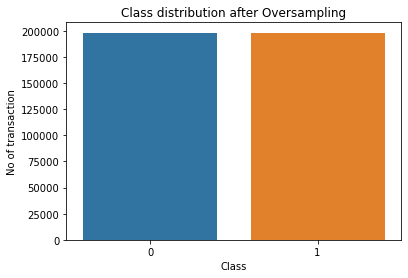

In [41]:
# Plotting class balance for Oversampled dataset
sns.countplot(x="Class", data=y_train_over)
plt.title("Class distribution after Oversampling")
plt.ylabel("No of transaction")
plt.show()

## Data Modeling

#### Applying Random Forest classifier (Original Dataset)

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn import metrics
random_forest = RandomForestClassifier(random_state=0)
from timeit import default_timer as timer

In [43]:
start = timer()
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds


Model runtime : 112.34349591983482


In [44]:
random_forest.score(X_test,y_test)

0.9995535609389319

In [45]:
#Create a function to store evaluartion metrices for all the models for comparision

names=[]
model_runtime =[]
aucs_tests = []
accuracy_tests = []
precision_tests = []
recall_tests = []
f1score_tests = []
Runtime =[]

def evaluate(name, y_test, y_pred ):
        
        #appending name
        names.append(name)
        
        #appending model runtime
        model_runtime.append(runtime)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_test = metrics.precision_score(y_test , y_pred)
        precision_tests.append(Precision_test)
        
        # calculate recall
        Recall_test = metrics.recall_score(y_test , y_pred)
        recall_tests.append(Recall_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_pred)
        f1score_tests.append(F1Score_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
        
        print("Accuracy :", Accuracy_test)
        print("Area Under Curve :", Aucs_test  )
        print("Precision :",Precision_test)
        print("Recall :", Recall_test)
        print("F1Scrore :", F1Score_test)
        print('Confusion Matrix : \n', cnf_matrix)
        sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')

Accuracy : 0.9995535609389319
Area Under Curve : 0.8914140370742005
Precision : 0.9099099099099099
Recall : 0.7829457364341085
F1Scrore : 0.8416666666666666
Confusion Matrix : 
 [[84979    10]
 [   28   101]]


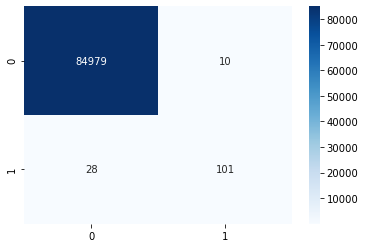

In [46]:
evaluate('Random Forest-original dataet', y_test, y_pred)

In [47]:
# confusion matrix
#matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
#print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
#tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
#print('Outcome values : \n tp fn fp tn\n', tp, fn, fp, tn)

#sns.heatmap(matrix, annot=True, fmt='', cmap='Blues')

# classification report for precision, recall f1-score and accuracy
#matrix = classification_report(y_test,y_pred,labels=[1,0])
#print('Classification report : \n',matrix)


In [48]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

In [49]:
# k-fold cross validation for the Random Forest using F1 score as a metric. 

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(random_forest, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print(scores)
print("Average F1Score is %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.81428571 0.85454545 0.95726496 0.83211679 0.80597015]
Average F1Score is 0.85 with a standard deviation of 0.05


#### Applying Random Forest classifier (for Under Sampling Dataset)

In [50]:
start= timer()
random_forest.fit(X_train_under,y_train_under.values.ravel())
y_pred_under = random_forest.predict(X_test_under)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds


Model runtime : 0.8466893220320344


Accuracy : 0.9771963626964919
Area Under Curve : 0.9382697587585662
Precision : 0.05675146771037182
Recall : 0.8992248062015504
F1Scrore : 0.10676484123331799
Confusion Matrix : 
 [[83061  1928]
 [   13   116]]


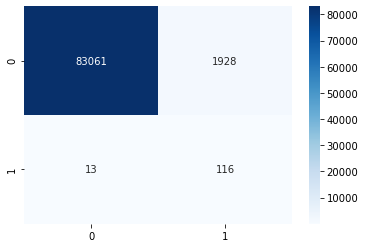

In [51]:
evaluate('Random Forest-with Undersampling', y_test_under, y_pred_under)

#### Applying Random Forest classifier (for Over Sampling Dataset)

In [52]:
start= timer()
random_forest.fit(X_train_over,y_train_over.values.ravel())
y_pred_over = random_forest.predict(X_test_over)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 214.04373704409227


Accuracy : 0.9992481026339904
Area Under Curve : 0.899001247858706
Precision : 0.7304964539007093
Recall : 0.7984496124031008
F1Scrore : 0.7629629629629631
Confusion Matrix : 
 [[84951    38]
 [   26   103]]


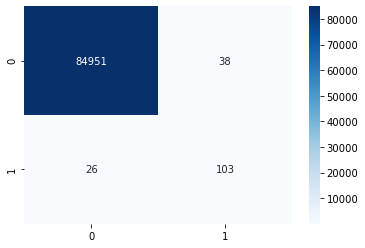

In [53]:
evaluate('Random Forest-with Oversampling', y_test_over, y_pred_over)

#### Logistic Regression (with Original Dataset)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logreg = LogisticRegression()
start = timer()
logreg.fit(X_train,y_train.values.ravel())
y_pred = logreg.predict(X_test)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 1.399646979290992


Accuracy : 0.9991071218778637
Area Under Curve : 0.7557374730026621
Precision : 0.8354430379746836
Recall : 0.5116279069767442
F1Scrore : 0.6346153846153846
Confusion Matrix : 
 [[84976    13]
 [   63    66]]


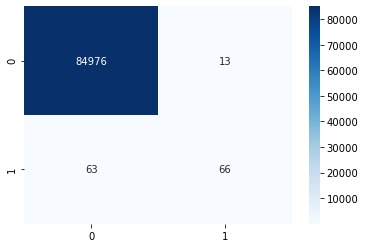

In [56]:
evaluate('Logistic Reg- Original Dataset', y_test, y_pred)

In [57]:
# k-fold cross validation for the Logistic Regression using F1 score as a metric. 

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print(scores)
print("Average F1Score is %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.63934426 0.73076923 0.76       0.72307692 0.74626866]
Average F1Score is 0.72 with a standard deviation of 0.04


#### Logistic Regression (with undersample Dataset)

In [58]:
start = timer()
logreg.fit(X_train_under,y_train_under.values.ravel())
y_pred_under = logreg.predict(X_test_under)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 0.013553259428590536


Accuracy : 0.9759862778730704
Area Under Curve : 0.9337937121092096
Precision : 0.053613053613053616
Recall : 0.8914728682170543
F1Scrore : 0.10114335971855762
Confusion Matrix : 
 [[82959  2030]
 [   14   115]]


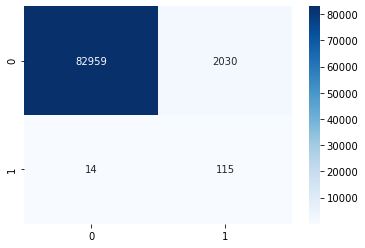

In [59]:
evaluate('Logistic Reg- with Undersampling', y_test_under, y_pred_under)

#### Logistic Regression (with Oversample Dataset)

In [60]:
start = timer()
logreg.fit(X_train_over,y_train_over.values.ravel())
y_pred_over = logreg.predict(X_test_over)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 2.359678205102682


Accuracy : 0.9730609271834395
Area Under Curve : 0.9400689884080757
Precision : 0.048790658882402
Recall : 0.9069767441860465
F1Scrore : 0.0925999208547685
Confusion Matrix : 
 [[82708  2281]
 [   12   117]]


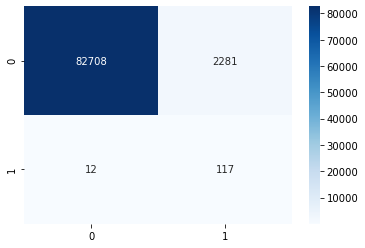

In [61]:
evaluate('Logistic Reg- with Oversampling', y_test_over, y_pred_over)

#### Applying KNN Algorithm - Original Dataset

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
KNN = KNeighborsClassifier()
start = timer()
KNN.fit(X_train,y_train.values.ravel())
y_pred = KNN.predict(X_test)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 23.405063485261053


Accuracy : 0.999530064146244
Area Under Curve : 0.8952723567235925
Precision : 0.8869565217391304
Recall : 0.7906976744186046
F1Scrore : 0.8360655737704918
Confusion Matrix : 
 [[84976    13]
 [   27   102]]


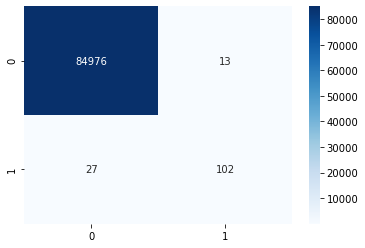

In [64]:
evaluate('KNN Algorithm - Original Dataset', y_test, y_pred)

In [65]:
# k-fold cross validation for the KNN algorithm using F1 score as a metric. 

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(KNN, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print(scores)
print("Average F1Score is %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.83098592 0.86238532 0.93103448 0.82962963 0.82089552]
Average F1Score is 0.85 with a standard deviation of 0.04


#### Applying KNN Algorithm - Undersample Dataset

In [66]:
start = timer()
KNN.fit(X_train_under,y_train_under.values.ravel())
y_pred_under = KNN.predict(X_test_under)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 2.9188725682906806


Accuracy : 0.9844333748443338
Area Under Curve : 0.9264134136465084
Precision : 0.07887323943661972
Recall : 0.8682170542635659
F1Scrore : 0.14460942543576502
Confusion Matrix : 
 [[83681  1308]
 [   17   112]]


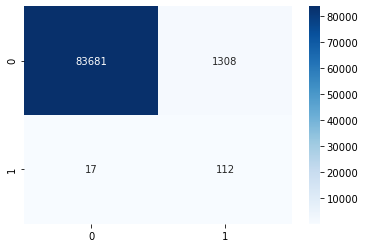

In [67]:
evaluate('KNN Algorithm - with Undersampling', y_test_under, y_pred_under)

#### Applying KNN Algorithm - Oversample Dataset

In [68]:
start = timer()
KNN.fit(X_train_over,y_train_over.values.ravel())
y_pred_over = KNN.predict(X_test_over)
end = timer()
runtime = end - start
print ('Model runtime :', runtime)# runtime in seconds

Model runtime : 23.934593588113785


Accuracy : 0.9966752038346766
Area Under Curve : 0.9131931893420591
Precision : 0.2907608695652174
Recall : 0.8294573643410853
F1Scrore : 0.43058350100603626
Confusion Matrix : 
 [[84728   261]
 [   22   107]]


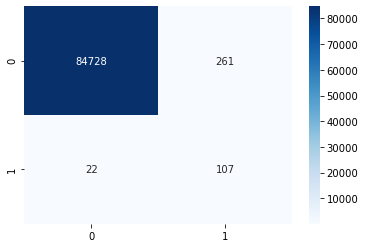

In [69]:
evaluate('KNN Algorithm - with Oversampling', y_test_over, y_pred_over)

#### Compliling results from different models

In [70]:
tabulate={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision' : precision_tests,
    'Recall': recall_tests, 
    'F1 Score': f1score_tests,
    'Runtime': model_runtime,
}

In [71]:
print("Comparing performance between the different models: \n")
comparision=pd.DataFrame(tabulate)
comparision.sort_values('F1 Score',ascending=False)

Comparing performance between the different models: 



,Model,Accuracy,AUC,Precision,Recall,F1 Score,Runtime
0,Random Forest-original dataet,0.999554,0.891414,0.909910,0.782946,0.841667,112.343496
6,KNN Algorithm - Original Dataset,0.999530,0.895272,0.886957,0.790698,0.836066,23.405063
2,Random Forest-with Oversampling,0.999248,0.899001,0.730496,0.798450,0.762963,214.043737
3,Logistic Reg- Original Dataset,0.999107,0.755737,0.835443,0.511628,0.634615,1.399647
8,KNN Algorithm - with Oversampling,0.996675,0.913193,0.290761,0.829457,0.430584,23.934594
7,KNN Algorithm - with Undersampling,0.984433,0.926413,0.078873,0.868217,0.144609,2.918873
1,Random Forest-with Undersampling,0.977196,0.938270,0.056751,0.899225,0.106765,0.846689
4,Logistic Reg- with Undersampling,0.975986,0.933794,0.053613,0.891473,0.101143,0.013553
5,Logistic Reg- with Oversampling,0.973061,0.940069,0.048791,0.906977,0.092600,2.359678


## Conclusion

Data imbalance poses a great challenge in builing an effective classification model. In this project we have used some differnet techiniques to treat data imbalance we will do a performance comparision of original dataset and the undersampled and oversampled dataset using Random Forest, Regression and KNN classfication algorithms. 

For this dataset accuracy will not be a good validation metric beause of the high class imbalance, therefore we will use Recall and F1 scroe for comparing the performance of these classification modeles. 

Recall = True Positive / (True Positive + False Negative)

F-Measure = (2 * Precision * Recall) / (Precision + Recall)

From comparing the results obtained from different models we observe Random Forest classification with the original dataset has the highest F1 score of (0.84). However, while comparing different models we also need to keep in mind the time complexity or the execution time for each of the classification models. Comparing both these metrices KNN algorithm has comparatively equivalent F1 score (0.83) but with the execution time reduced to one fourth of the the Random Forest. So with these observations we can conclude that among the different models that are included in scope of this project  KNN algorithm provides best results in terms of predicting the Fraud transactions correctly and with a minimum execution time. 